First 5 rows:
              Name            Timestamp   Status Description  \
0  Conveyor Belt 4  2025-08-15 00:00:00  Running         NaN   
1  Conveyor Belt 4  2025-08-15 00:15:00  Running         NaN   
2  Conveyor Belt 4  2025-08-15 00:30:00  Running         NaN   
3  Conveyor Belt 4  2025-08-15 00:45:00  Running         NaN   
4  Conveyor Belt 4  2025-08-15 01:00:00  Running         NaN   

   Vibration Frequency  Vibration Amplitude  Bearing Temperature  \
0              1490.82                 0.04               77.130   
1              1498.37                 0.04               77.076   
2              1503.22                 0.06               77.307   
3              1508.11                 0.04               77.474   
4              1498.13                 0.06               77.785   

   Motor Temperature  Belt Load  Torque  Noise Levels  Current and Voltage  \
0             96.902       1.36  318.07         55.12                15.79   
1             96.975       1.07  295

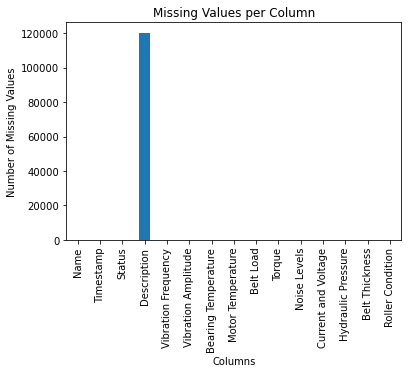

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

training_files = [
    "Belt 1 9 Months negative data.xlsx",
    "Belt 2 9 Months negative data.xlsx",
    "Belt 3 9 Months negative data.xlsx",
    "Belt 4 9 Months negative data.xlsx",
    "Belt 5 9 Months negative data.xlsx"
]

dfs = []
for file in training_files:
    df_temp = pd.read_excel(file)
    dfs.append(df_temp)
df_merged = pd.concat(dfs, ignore_index=True)

df = df_merged
print("First 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
missing = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing)

missing.plot(kind='bar', title='Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


In [118]:
if df['Name'].nunique() == 1:
    print("The 'name' column is constant and will be dropped.")
    df.drop('Name', axis=1, inplace=True)


KeyError: 'Name'

In [ ]:
import pandas as pd

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

invalid_dates = df[df['Timestamp'].isnull()]
print("Invalid dates found:\n", invalid_dates)

df = df.dropna(subset=['Timestamp'])

df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second

df['timestamp_numeric'] = df['Timestamp'].apply(lambda x: x.timestamp())

print(df.info())


Invalid dates found:
        Timestamp   Status Description  Vibration Frequency  \
19008        NaT  Running         NaN              1490.82   
19009        NaT  Running         NaN              1498.37   
19010        NaT  Running         NaN              1503.22   
19011        NaT  Running         NaN              1508.11   
19012        NaT  Running         NaN              1498.13   
...          ...      ...         ...                  ...   
123935       NaT  Running         NaN              1506.74   
123936       NaT  Running         NaN              1502.84   
123937       NaT  Running         NaN              1503.36   
123938       NaT  Running         NaN              1498.34   
123939       NaT  Running         NaN              1495.26   

        Vibration Amplitude  Bearing Temperature  Motor Temperature  \
19008                  0.04               77.130             96.902   
19009                  0.04               77.076             96.975   
19010               

<ipython-input-119-496794084819>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Timestamp'].dt.year
<ipython-input-119-496794084819>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Timestamp'].dt.month
<ipython-input-119-496794084819>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130565 entries, 0 to 131044
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Timestamp            130565 non-null  datetime64[ns]
 1   Status               130565 non-null  object        
 2   Description          10720 non-null   object        
 3   Vibration Frequency  130565 non-null  float64       
 4   Vibration Amplitude  130565 non-null  float64       
 5   Bearing Temperature  130565 non-null  float64       
 6   Motor Temperature    130565 non-null  float64       
 7   Belt Load            130565 non-null  float64       
 8   Torque               130565 non-null  float64       
 9   Noise Levels         130565 non-null  float64       
 10  Current and Voltage  130565 non-null  float64       
 11  Hydraulic Pressure   130565 non-null  float64       
 12  Belt Thickness       130565 non-null  float64       
 13  Roller Conditi

<ipython-input-119-496794084819>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp_numeric'] = df['Timestamp'].apply(lambda x: x.timestamp())


In [120]:
nat_count = df['Timestamp'].isna().sum()
print("Number of NaT values in 'Timestamp':", nat_count)
df.head()


Number of NaT values in 'Timestamp': 0


,Timestamp,Status,Description,Vibration Frequency,Vibration Amplitude,Bearing Temperature,Motor Temperature,Belt Load,Torque,Noise Levels,...,Hydraulic Pressure,Belt Thickness,Roller Condition,year,month,day,hour,minute,second,timestamp_numeric
0,2025-08-15 00:00:00,Running,NaN,1490.82,0.04,77.130,96.902,1.36,318.07,55.12,...,382.09,1.58000,86.000,2025,8,15,0,0,0,1.755216e+09
1,2025-08-15 00:15:00,Running,NaN,1498.37,0.04,77.076,96.975,1.07,295.50,59.68,...,376.48,1.57950,85.854,2025,8,15,0,15,0,1.755217e+09
2,2025-08-15 00:30:00,Running,NaN,1503.22,0.06,77.307,96.755,1.21,314.38,58.20,...,384.20,1.57925,85.781,2025,8,15,0,30,0,1.755218e+09
3,2025-08-15 00:45:00,Running,NaN,1508.11,0.04,77.474,97.661,1.29,311.84,56.16,...,379.79,1.57900,85.708,2025,8,15,0,45,0,1.755219e+09
4,2025-08-15 01:00:00,Running,NaN,1498.13,0.06,77.785,97.471,1.07,317.14,55.39,...,383.95,1.57875,85.635,2025,8,15,1,0,0,1.755220e+09


In [ ]:

df = pd.get_dummies(df, columns=['Status'], prefix='status')

In [ ]:

non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
df_model = df.drop(non_numeric_cols, axis=1)

df=df_model

print("Columns used for modeling:", df_model.columns)
df.head()


Non-numeric columns: Index(['Description'], dtype='object')
Columns used for modeling: Index(['Timestamp', 'Vibration Frequency', 'Vibration Amplitude',
       'Bearing Temperature', 'Motor Temperature', 'Belt Load', 'Torque',
       'Noise Levels', 'Current and Voltage', 'Hydraulic Pressure',
       'Belt Thickness', 'Roller Condition', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'timestamp_numeric', 'status_Down',
       'status_Maintenance', 'status_Running'],
      dtype='object')


,Timestamp,Vibration Frequency,Vibration Amplitude,Bearing Temperature,Motor Temperature,Belt Load,Torque,Noise Levels,Current and Voltage,Hydraulic Pressure,...,year,month,day,hour,minute,second,timestamp_numeric,status_Down,status_Maintenance,status_Running
0,2025-08-15 00:00:00,1490.82,0.04,77.130,96.902,1.36,318.07,55.12,15.79,382.09,...,2025,8,15,0,0,0,1.755216e+09,0,0,1
1,2025-08-15 00:15:00,1498.37,0.04,77.076,96.975,1.07,295.50,59.68,14.34,376.48,...,2025,8,15,0,15,0,1.755217e+09,0,0,1
2,2025-08-15 00:30:00,1503.22,0.06,77.307,96.755,1.21,314.38,58.20,15.03,384.20,...,2025,8,15,0,30,0,1.755218e+09,0,0,1
3,2025-08-15 00:45:00,1508.11,0.04,77.474,97.661,1.29,311.84,56.16,15.43,379.79,...,2025,8,15,0,45,0,1.755219e+09,0,0,1
4,2025-08-15 01:00:00,1498.13,0.06,77.785,97.471,1.07,317.14,55.39,14.35,383.95,...,2025,8,15,1,0,0,1.755220e+09,0,0,1


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import joblib

df = df.sort_values('Timestamp').reset_index(drop=True)

df['downtime_timestamp'] = df['Timestamp'].where(df['status_Down'] == 1).shift(-1)

df['time_to_downtime'] = (df['downtime_timestamp'] - df['Timestamp']).dt.total_seconds()
df_reg = df.dropna(subset=['time_to_downtime'])
df_reg = df_reg[df_reg['time_to_downtime'] > 0].copy()

drop_cols = ['Timestamp', 'timestamp_numeric', 'status_Down', 'status_Maintenance', 'status_Running', 'downtime_timestamp', 'time_to_downtime']
X_reg = df_reg.drop(columns=drop_cols, errors='ignore')

X_reg = X_reg.select_dtypes(include=['number', 'bool', 'category'])
print("Features for regression (X_reg):")
print(X_reg.dtypes)

y_reg = df_reg['time_to_downtime']

split_idx_reg = int(0.8 * len(df_reg))
X_reg_train = X_reg.iloc[:split_idx_reg]
X_reg_test  = X_reg.iloc[split_idx_reg:]
y_reg_train = y_reg.iloc[:split_idx_reg]
y_reg_test  = y_reg.iloc[split_idx_reg:]

xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X_reg_train, y_reg_train)

y_reg_pred = xgb_regressor.predict(X_reg_test)
mae_reg = mean_absolute_error(y_reg_test, y_reg_pred)
print("Regression MAE for Time-to-Downtime Prediction (XGBoost):", mae_reg)
joblib.dump(xgb_regressor, 'xgb_regressor_time_to_event.pkl')


Features for regression (X_reg):
Vibration Frequency    float64
Vibration Amplitude    float64
Bearing Temperature    float64
Motor Temperature      float64
Belt Load              float64
Torque                 float64
Noise Levels           float64
Current and Voltage    float64
Hydraulic Pressure     float64
Belt Thickness         float64
Roller Condition       float64
year                     int64
month                    int64
day                      int64
hour                     int64
minute                   int64
second                   int64
dtype: object
Regression MAE for Time-to-Downtime Prediction (XGBoost): 0.0


['xgb_regressor_time_to_event.pkl']

In [ ]:
print("All actual and predicted time-to-downtime values:")
results_df = pd.DataFrame({
    'Actual_TimeToDowntime_sec': y_reg_test.values,
    'Predicted_TimeToDowntime_sec': y_reg_pred
})
print(results_df)

All actual and predicted time-to-downtime values:
    Actual_TimeToDowntime_sec  Predicted_TimeToDowntime_sec
0                       900.0                         900.0
1                       900.0                         900.0
2                       900.0                         900.0
3                       900.0                         900.0
4                       900.0                         900.0
5                       900.0                         900.0
6                       900.0                         900.0
7                       900.0                         900.0
8                       900.0                         900.0
9                       900.0                         900.0
10                      900.0                         900.0
11                      900.0                         900.0
12                      900.0                         900.0
13                      900.0                         900.0
14                      900.0                     